<a href="https://colab.research.google.com/github/michele25-10/Python/blob/main/lesson4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import tensorflow as tf
import numpy as np
import tensorflow.keras as k

In [36]:
mnist = tf.keras.datasets.mnist
(X, y), _ =mnist.load_data()

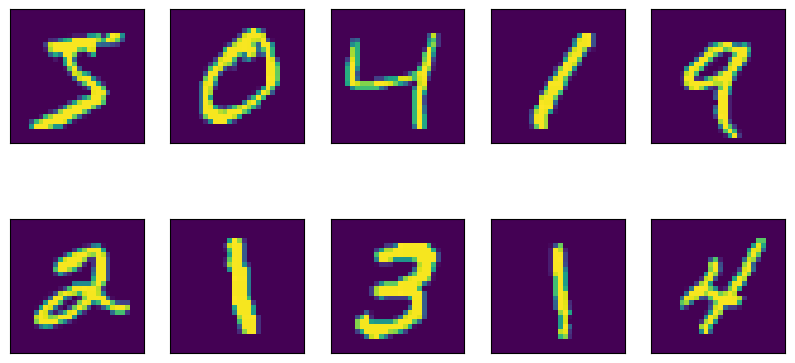

In [37]:
import matplotlib.pyplot as plt

X = X / 255.0

f = plt.figure(figsize=(10,5))
nrows, ncols = 2, 5
axs = f.subplots(nrows, ncols)
for i in range(10):
  ax = axs[i//ncols, i % ncols]
  ax.matshow(X[i,...])
  ax.set_xticks([])
  ax.set_yticks([])

f.show()


In [38]:
print(f'Y: {np.unique(y)}')

Y: [0 1 2 3 4 5 6 7 8 9]


In [39]:
X.shape

(60000, 28, 28)

In [40]:
X = X.reshape(-1, X.shape[1] * X.shape[2])

In [41]:
X.shape

(60000, 784)

In [42]:
def plot_loss_acc(history):
    f = plt.figure(figsize=(15,5))
    axs = f.subplots(1,2)
    axs[0].plot(history.history['loss'], label='loss')
    axs[1].plot(history.history['sparse_categorical_accuracy'])
    plt.tight_layout()
    for ax in axs.ravel():
      ax.grid(True)

In [43]:
k.backend.clear_session()
model = k.models.Sequential([
    k.layers.Dense(8, activation='relu', input_shape=[X.shape[1]]),
    k.layers.Dense(16, activation='relu'),
    k.layers.Dense(np.unique(y).shape[0], activation='softmax')
])
model.save_weights("init.weights.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
model.compile(optimizer=k.optimizers.SGD(),
              loss = k.losses.sparse_categorical_crossentropy, metrics=[k.metrics.sparse_categorical_accuracy])
history = model.fit(X, y, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.6691 - sparse_categorical_accuracy: 0.4262
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.5466 - sparse_categorical_accuracy: 0.8441
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.4051 - sparse_categorical_accuracy: 0.8846
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.3593 - sparse_categorical_accuracy: 0.8976
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.3257 - sparse_categorical_accuracy: 0.9066
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.3055 - sparse_categorical_accuracy: 0.9123
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2844 - sparse_categorical_accuracy: 0.9193
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.2791 - sparse_categorical_accuracy: 0.9208
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2696 - sparse_categorical_accuracy: 0.9241
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━

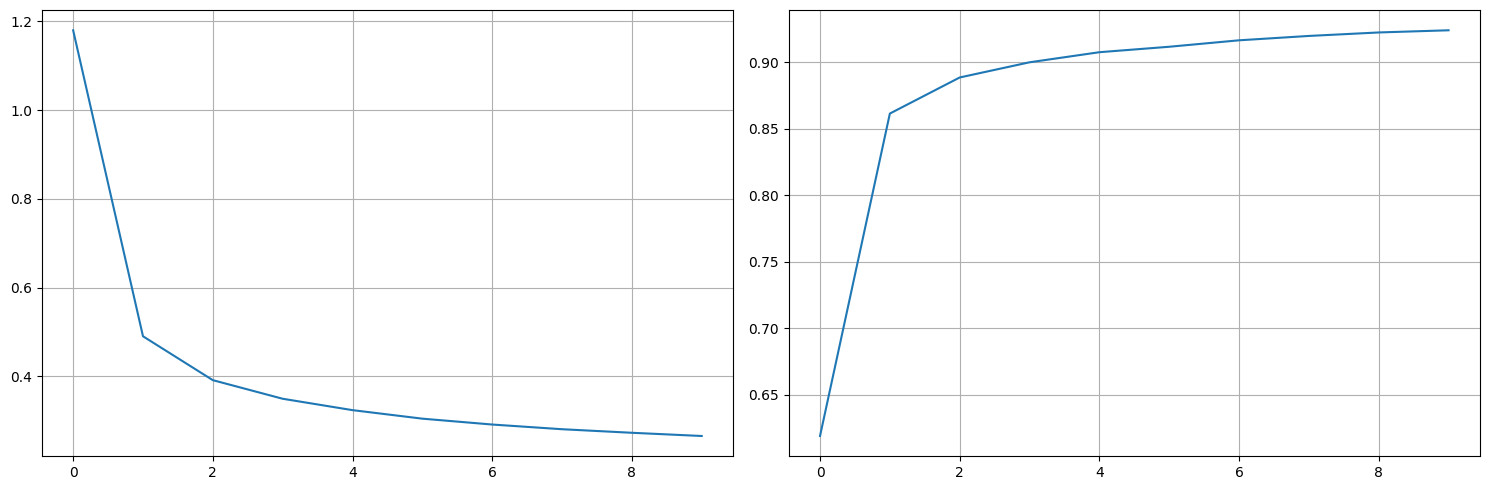

In [45]:
plot_loss_acc(history)

In [46]:
model.load_weights("init.weights.h5")
model.compile(optimizer=k.optimizers.SGD(momentum=0.9),
              loss = k.losses.sparse_categorical_crossentropy, metrics=[k.metrics.sparse_categorical_accuracy])
history = model.fit(X, y, epochs=10, batch_size=32)

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'SGD', because it has 2 variables whereas the saved optimizer has 0 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.8769 - sparse_categorical_accuracy: 0.7096
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.3274 - sparse_categorical_accuracy: 0.9022
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2854 - sparse_categorical_accuracy: 0.9143
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2668 - sparse_categorical_accuracy: 0.9200
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.2502 - sparse_categorical_accuracy: 0.9232
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2513 - sparse_categorical_accuracy: 0.9235
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2383 - sparse_categorical_accuracy: 0.9275
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2375 - sparse_categorical_accuracy: 0.9291
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2290 - sparse_categorical_accuracy: 0.9300
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━

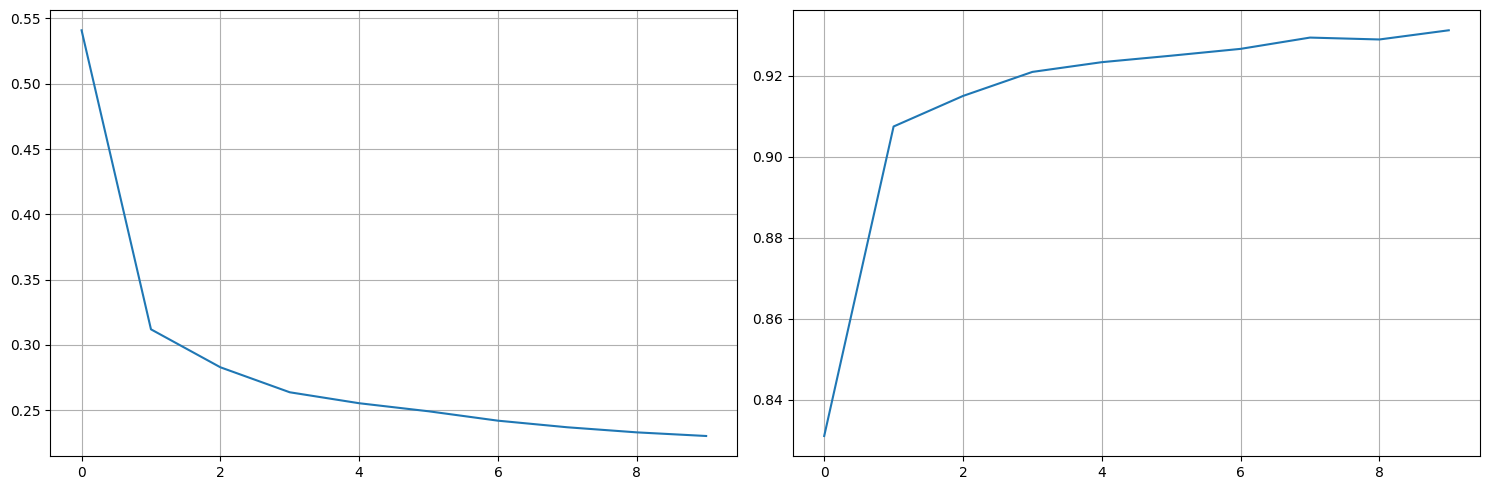

In [47]:
plot_loss_acc(history)